In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error

In [11]:
df = pd.read_csv('Yamaha_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])
df.head()
len(df)

1452

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1452 non-null   datetime64[ns]
 1   Price   1452 non-null   int64         
 2   Open    1452 non-null   int64         
 3   High    1452 non-null   int64         
 4   Low     1452 non-null   int64         
 5   Volume  1452 non-null   int64         
 6   Change  1452 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 79.5 KB


In [13]:
print(df)
df.describe()

           Date   Price    Open    High     Low    Volume  Change
0    2018-01-04  432000  421000  432000  420500  11600000    3850
1    2018-01-05  438000  434000  438500  431500   9426000    1390
2    2018-01-09  446500  441500  447000  437500   9687000    1940
3    2018-01-10  452000  447000  453000  446500   7640000    1230
4    2018-01-11  454000  452500  454500  451500   7968000     440
...         ...     ...     ...     ...     ...       ...     ...
1447 2023-12-08  321600  327100  327100  319900  14400000   -1680
1448 2023-12-11  321600  325900  326900  321300   9444000       0
1449 2023-12-12  317600  326900  327100  317400   9914000   -1240
1450 2023-12-13  321800  319000  323000  319000  10400000    1320
1451 2023-12-14  314200  320500  320500  313300  11100000   -2360

[1452 rows x 7 columns]


,Date,Price,Open,High,Low,Volume,Change
count,1452,1452.000000,1452.000000,1452.000000,1452.00000,1.452000e+03,1452.000000
mean,2020-12-26 16:00:59.504132352,534245.110193,534465.840220,540058.057851,528327.61708,6.088632e+06,1.225895
min,2018-01-04 00:00:00,314200.000000,319000.000000,320500.000000,313300.00000,1.144000e+06,-14570.000000
25%,2019-07-01 18:00:00,493875.000000,494000.000000,499000.000000,489000.00000,4.071750e+06,-1132.500000
50%,2020-12-28 12:00:00,531500.000000,532000.000000,537000.000000,526000.00000,5.324000e+06,0.000000
75%,2022-06-24 18:00:00,577000.000000,579000.000000,584000.000000,572000.00000,7.116750e+06,1070.000000
max,2023-12-14 00:00:00,744000.000000,745000.000000,749000.000000,736000.00000,3.140000e+07,12670.000000
std,NaN,69572.114292,69404.166264,69887.756992,68896.27649,3.185040e+06,2029.921662


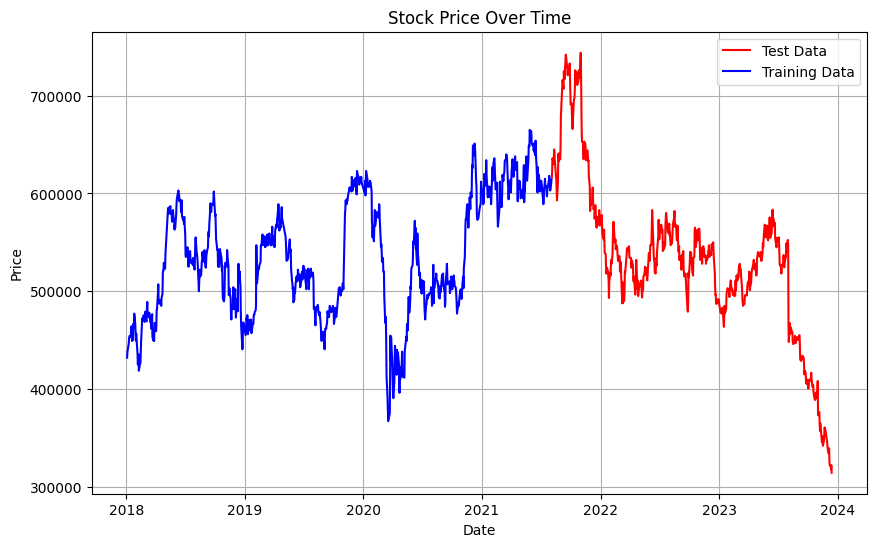

In [14]:
# Split data into training (60%) and test (40%)
train_data, test_data = train_test_split(df, test_size=0.4, shuffle=False)

# Plotting both training and test data on the same chart
plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price'], linestyle='-',  color='r', label='Test Data')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data')

plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
train_data, test_data = train_test_split(df, test_size=0.4, shuffle=False)

# Drop the 'Date' column from both X_train and X_test
X_train = train_data.drop(['Price', 'Date'], axis=1)
y_train = train_data['Price']

X_test = test_data.drop(['Price', 'Date'], axis=1)
y_test = test_data['Price']

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [16]:
n_days_for_prediction= 30
cols = list(df)[1:6]
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_days_for_prediction).tolist()
print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])
df_for_training = df[cols].astype(float)

[Timestamp('2023-12-14 00:00:00'), Timestamp('2023-12-15 00:00:00'), Timestamp('2023-12-16 00:00:00'), Timestamp('2023-12-17 00:00:00'), Timestamp('2023-12-18 00:00:00'), Timestamp('2023-12-19 00:00:00'), Timestamp('2023-12-20 00:00:00'), Timestamp('2023-12-21 00:00:00'), Timestamp('2023-12-22 00:00:00'), Timestamp('2023-12-23 00:00:00'), Timestamp('2023-12-24 00:00:00'), Timestamp('2023-12-25 00:00:00'), Timestamp('2023-12-26 00:00:00'), Timestamp('2023-12-27 00:00:00'), Timestamp('2023-12-28 00:00:00'), Timestamp('2023-12-29 00:00:00'), Timestamp('2023-12-30 00:00:00'), Timestamp('2023-12-31 00:00:00'), Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-02 00:00:00'), Timestamp('2024-01-03 00:00:00'), Timestamp('2024-01-04 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-01-06 00:00:00'), Timestamp('2024-01-07 00:00:00'), Timestamp('2024-01-08 00:00:00'), Timestamp('2024-01-09 00:00:00'), Timestamp('2024-01-10 00:00:00'), Timestamp('2024-01-11 00:00:00'), Timestamp('20

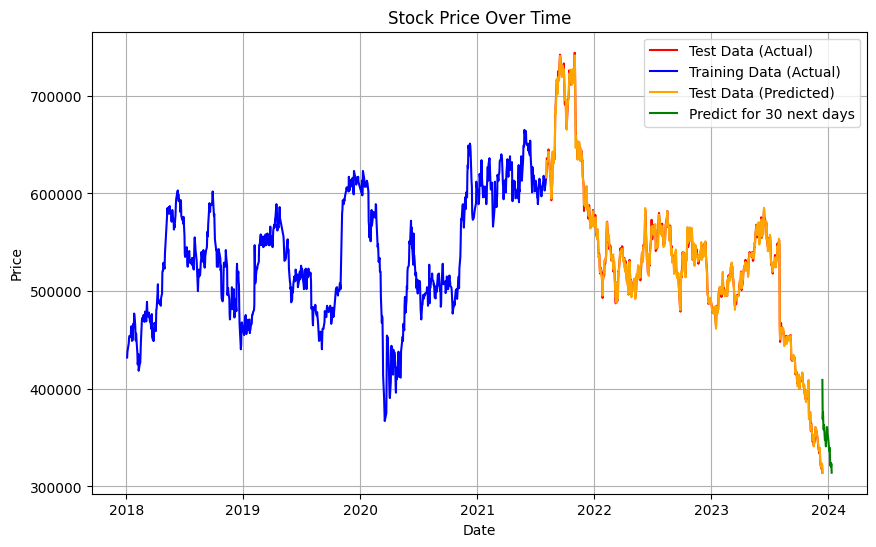

In [17]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test Data (Actual)')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data (Actual)')
plt.plot(test_data['Date'], y_pred, linestyle='-', color='orange', label='Test Data (Predicted)')
plt.plot(predict_period_dates, prediction1, linestyle='-', color='g', label='Predict for 30 next days')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have y_test and y_pred already defined
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
hl = mean_squared_error(y_test, y_pred, multioutput='raw_values')

# Print the metrics including Huber loss
print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'Huber Loss: {hl[0]:.2f}')  # Assuming you have a single output variable

MAPE: 0.38%
MAE: 2047.49
RMSE: 2700.82
Huber Loss: 7294411.09
